In [1]:
#Загружаем наш дата сет. Крайний столбец Purchased выступает как классификатор. Так же из датасета уберем столбец UserID. 

In [1]:
# С помощью этой чанки мы загрузим  необходимые библиотеки для начала работы (Numpy, Matplotlib.pyplot ,Pandas)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Загрузим над исходный датасет. 
df = pd.read_csv('Exam1.csv', sep=',' )
df = df.drop(['UserID'], axis=1)

In [3]:
# В этой чанке проверяется что было загруженно в переменную df.
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [4]:
# С пмощью этой чанки мы произведем кодиррование наших качественных перменных, в нашем случае только столбец Gender.
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [5]:
df = encoding_char(df)

In [6]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [7]:
# Наш датасет следует разделить на тестовый и учебный в определенной пропорции. Пусть это будет  20/80.
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [8]:
# Производим шкалирование наших данных без нашей  переменной Purchased.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
# Строим базовую модель и анализируем  полученный отчет. Можно сделать вывод, что значимых перменных 2. Будем использовать их для построения наших классификаторов.
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.380897
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.424     
Dependent Variable: y                AIC:              249.7740  
Date:               2021-01-12 19:51 BIC:              261.0789  
No. Observations:   320              Log-Likelihood:   -121.89   
Df Model:           2                LL-Null:          -211.70   
Df Residuals:       317              LLR p-value:      9.8765e-40
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1     -0.1428      0.1597    -0.8944    0.3711    -0.4559    0.1702
x2      2.3168      0.2879     8.0460    0.0000     1.

In [10]:
# Остлавляем только значимые переменные.
X_train = X_train[:,[1,2]]
X_test = X_test[:,[1,2]]

In [11]:
# Обучаем модель логистической регрессии.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [12]:
# Делаем прогноз на тестовой выборке. Уровень качества модели превышает 83%, это значит что  83% объектов распознано верно.
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.8375

In [13]:
# Строим таблицу сопряженности. Можно сделать вывод, что 6 положительных случая ложно определены как отрицательные. 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  7]
 [ 6 17]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


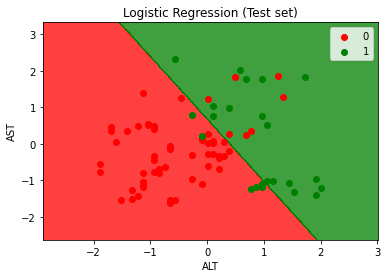

In [14]:
# Строим область значений. В этом случае отделение линейно.
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.legend()
plt.show()

In [15]:
# Устанавливаем необходимые пакеты Keras.
import keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
# Строим нейронную сеть прямой передачи сигнала. На входном слое 4 нейрона. relu - функция  позволит учесть наличие линейнносоти в исходных данных. На втором слое выбирем 1 нейрон используя сигмоидальную функцию. 
cnn = Sequential()
cnn.add(Dense(units = 4,  activation = 'relu', input_dim = 2))
cnn.add(Dense(units = 1,  activation = 'sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
# Обучаем нейронную сеть в течении 100 эпох.
cnn.fit(X_train, y_train, epochs = 100, batch_size = 8)

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.3625
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6661 - accuracy: 0.4406
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.5594
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6175 - accuracy: 0.6375
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6006 - accuracy: 0.7406
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5859 - accuracy: 0.8062
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.8188
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5648 - accuracy: 0.8281
Epoch 9/100
40/40 [==============================] - 0s 8ms/step - loss: 0.5563 - accuracy: 0.8250
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5490 - accuracy: 0.8250
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.3284 - accuracy: 0.8813
Epoch 83/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8813
Epoch 84/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8813
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8813
Epoch 86/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8813
Epoch 87/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3217 - accuracy: 0.8813
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.8813
Epoch 89/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3193 - accuracy: 0.8844
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8844
Epoch 91/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8844
Epoch 92/100


In [22]:
# Строим прогноз на тестовой выборке.
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.4)

In [23]:
# Строим таблицу сопряженности. Исходя из этого  2 положительных случая ложно определены как отрицательные.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48  9]
 [ 2 21]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


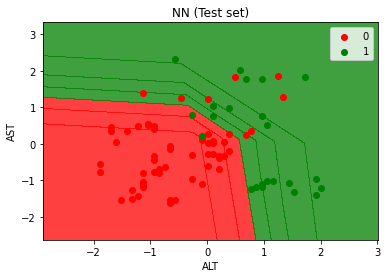

In [24]:
# Строим область значений. Они отделяются  не линейно.
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.legend()
plt.show()

In [ ]:
# Выводы. Исходя из анализа можно сделать вывод, что исходная логистическая модель обладает повышенным качеством и определяет 83% объектов верно. Еще я бы отметил, что позитивные и негативные значения отделяются линейно. Эту линейность мы используем для построения нейронной сети. При использовании стандартных параметров мы получаем качество модели хуже, но при этом сохраняется линейность отделения позитивных от негативных. Для улучшения качества модели было принято решение увеличить количество нейронов на первом слое с 2 до 8, что позволило немного улучшить качество модели в целом, однако разделение положительных от отрицательных более не линейно.Были проведены также эксперименты с моделью но результат улучшить не удалось